# Optimal Law Enforcement with python (deterrence model)
The criminal sanction is an instrument for deterring illegal behavior. It penalizes individuals who break the law. In other words, the sanction is applied to those who commit the offence. The sanction can take two forms: monetary and non-monetary. 

In this workshop, we will first consider the monetary sanction, commonly called the fine. It is similar to a discouraging tool that takes the form of a monetary sanction.
expected benefit if the offender is a risk-neutral individual
The ideas developed revolve around the introduction of the fine as a deterrent to the offence aimed at forcing individuals to respect the law.  The fine has a specificity that allows to measure the degree of deterrence that the Authority in charge of law enforcement wishes to achieve through two determining variables: the effort of the control that constitutes a cost for the Law enforcer, and increases the probability of detecting an offender and the amount of the fine that translates into a monetary sanction imposed on the offender.
According to Becker (1968), the optimal level of deterrence is the maximum fine, i.e. the equilibrium at which the fine is theoretically capable of deterring illegal acts.

## Expected utility formula in Becker's canonical model
$$ EU (b,q,S) = (1-q)b + q(b-S)$$
After simplification,
$$ EU (b,q,s) = b - qS$$
with \
$q$ : probability of arrest and conviction\
$b$ : expected benefit from the illegal act\
$S$ : fine or monetary sanction
## Expected benefit if the offender is a risk-neutral individual
$$EU = 0$$
$$⇒ b = qS$$ 
This equation means that if the benefit from the crime equals at least the expected punishment, the offender will commit the crime. This equation means that if the benefit from the crime is at least equal to the expected punishment, the offender will commit the crime. Otherwise, he will give up because he is deterred by the punishment


In [1]:
from sympy import *
from IPython.core.interactiveshell import InteractiveShell #print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)
%matplotlib inline

# Definition of functions and variables 


In [2]:
q, b, S, h, w, B, h0 = symbols('q, b, S, h, w, bbar, h0') # p : probability of arrest and conviction, b : monetary benefit after accomplishing crime, S : sanction or fine, h : harm, w : victim's wealth
EU1 = symbols('EU1', cls=Function)(q,b,S) # expected utility for the offender
EU2 = symbols ('EU2', cls=Function)(q,h,w) # Expected utility for the victim
f = symbols ('f', cls = Function)(b) # density function of b
C = symbols ('C', cls = Function)(q) # cost of apprehension and conviction
dF = symbols ('dF', cls = Function)(b) # cumulative function
b0 = symbols ('b0', cls = Function)(q,S) # monetary benefit expected

EU1
EU2
f
C

In [3]:
def EU1(q, b=b, S=S):
    return (1-q)*b + q*(b-S)

def EU2(q, w=w, h =h):
    return (1-q)*(w -h) + q*w

def b_expected(S=S, q=q) :
    return q*S

# Marginal cost of apprehension and conviction

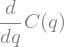

In [4]:
# marginal cost of apprehension and conviction
c_m = C.diff(q)
c_m

In [5]:
q_m = EU1(q, b, S).diff(q)
s_m = EU1(q, b, S).diff(S)
b_m = EU1(q, b, S).diff(b)
q_m
s_m
b_m

# Expected benefit if the offender is a risk-neutral individual

In [6]:
# for an individual risk neutral E(p,b,S)=0, we get the follow result, and to found "b" expected, we solve the equation E = 0
EU1 = (1-q)*b + q*(b-S)
eq1 = Eq(simplify(EU1), 0)
eq1
b_expect = solve(eq1,b)[0]
eq2 = Eq(b, b_expect)
eq2

# Welfare

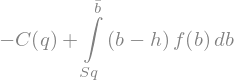

C:\Users\raletso\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sympy\core\relational.py:499: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


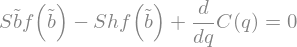

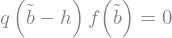

In [7]:
# welfare
b0 = q*S
funct = (b-h)*f # welfare function
welfare = integrate(funct, (b, (b0, B))) - C
welfare


derive_q = Eq(welfare.diff(q)) # derivative with respect to q
q_star = solve(derive_q, 0) [0]

equa_q = Eq(factor(q_star),0)
equa_q.subs(q*S,'btilde')

derive_s = Eq(welfare.diff(S)) # derivative with respect to S
S_star = solve(derive_s, 0) [0]
S_star
equa_S = Eq(factor(S_star),0)
equa_S.subs(q*S,'btilde')

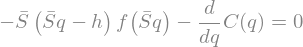

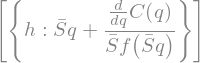

In [8]:
# optimum

q0 = symbols ('qbar', real = True)
S0 = symbols ('Sbar', real = True)

derive_q.subs(S, S0)
solve(derive_q.subs(S, S0))

equa_S = Eq(S_star.subs(q,q0),0)
equa_S

S_opt = equa_S.subs(q, q0)
solve(S_opt)

# Sample application

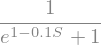

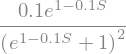

In [9]:
import numpy
import scipy.signal
import scipy.optimize
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.integrate import odeint
%matplotlib inline
# Use LaTeX throughout the figure for consistency
#rc('font', **{'family': 'serif', 'serif': ['Helvetca'], 'size': 12}) # u cane usetex package if your version can support
#rc('text', usetex=True)

q= 0.1
F = 1/(1+exp(1 - q*S)) # cumulative function of crime' benefit, b =qS, q fixed, our example is a cumulative function logistic
F
f = F.diff(S) # denstity function -logistic of benefit of crime b = qS
f

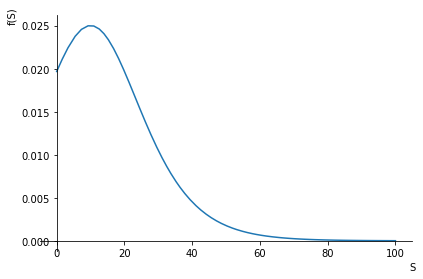

In [10]:
plot(f, (S,0, 100))


Text(0.5,0,"Probabilité d'arrestation et de punition")

Text(0,0.5,'Benefice du crime')

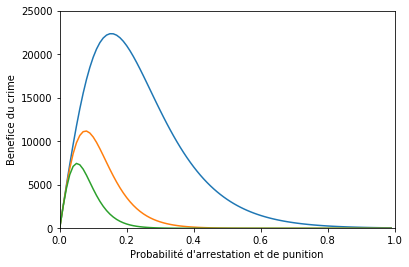

In [11]:
import numpy as np
#sanction fixe
S0= 10
h0 = 10
p = np.arange(0, 1, 0.01)

b0 = 1000000*(p*np.exp(-p*S0))/(np.exp(-p*S0)+1)**2

S1= 20
h1 = 20
b1 = 1000000*(p*np.exp(-p*S1))/(np.exp(-p*S1)+1)**2

S2= 30
h=30
b2 = 1000000*(p*np.exp(-p*S2))/(np.exp(-p*S2)+1)**2

#p = [p for p in range (0, 1)] # axe des abscises

#plt.axhline(y=7500, color="black", linestyle="--")
#plt.axhline(y=12500, color="black", linestyle="--")
#plt.axhline(y=22500, color="black", linestyle="--")
#plt.axvline(color="grey")
plt.plot(p, b0, label='$Santion = 10$')
plt.plot(p, b1, label='$Sanction = 20$')
plt.plot(p, b2, label='$Sanction = 30$')
plt.xlim(0 , 1)
plt.ylim(0, 25000)
plt.xlabel("Probabilité d'arrestation et de punition")
plt.ylabel("Benefice du crime")
#plt.legend(fontsize=14)
plt.show()